In [44]:
import pandas as pd
import numpy as np

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.model_selection import train_test_split , StratifiedKFold
from sklearn.feature_selection import RFECV

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 8,6

In [8]:
def plot_histograms( df , variables , n_rows , n_cols ):
    fig = plt.figure( figsize = ( 16 , 12 ) )
    for i, var_name in enumerate( variables ):
        ax=fig.add_subplot( n_rows , n_cols , i+1 )
        df[ var_name ].hist( bins=10 , ax=ax )
        ax.set_title( 'Skew: ' + str( round( float( df[ var_name ].skew() ) , ) ) ) # + ' ' + var_name ) #var_name+" Distribution")
        ax.set_xticklabels( [] , visible=False )
        ax.set_yticklabels( [] , visible=False )
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

In [9]:
def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

In [10]:
def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

In [11]:
def plot_correlation_map( df ):
    corr = titanic.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

In [12]:
def describe_more( df ):
    var = [] ; l = [] ; t = []
    for x in df:
        var.append( x )
        l.append( len( pd.value_counts( df[ x ] ) ) )
        t.append( df[ x ].dtypes )
    levels = pd.DataFrame( { 'Variable' : var , 'Levels' : l , 'Datatype' : t } )
    levels.sort_values( by = 'Levels' , inplace = True )
    return levels

In [13]:
def plot_variable_importance( X , y ):
    tree = DecisionTreeClassifier( random_state = 99 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )

In [14]:
def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))

In [22]:
def cleanTicket(tic):
        tic=tic.replace(".","")
        tic=tic.replace("/","")
        tic=tic.split()
        tic=map(lambda t : t.strip(), tic)
        tic=list(filter(lambda t: not t.isdigit(), tic))
        if len(tic) >0:
            return tic[0]
        else:
            return 'XXX'
ticket=pd.DataFrame()
ticket["Ticket"]= full['Ticket'].map(cleanTicket)
ticket=pd.get_dummies(ticket["Ticket"], prefix="Ticket")

In [2]:
train_data=pd.read_csv("train.csv")

In [3]:
test_data=pd.read_csv("test.csv")

In [4]:
full=train_data.append(test_data, ignore_index=True)

titanic =full[:891]

del train_data, test_data

print('Datasets:'," full: ", full.shape ,' titanic :', titanic.shape)

Datasets:  full:  (1309, 12)  titanic : (891, 12)


A:\Anaconda\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [5]:
titanic.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [6]:
titanic.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,0.381594,446.000000,2.308642,0.523008,0.383838
std,14.526497,49.693429,0.806057,257.353842,0.836071,1.102743,0.486592
min,0.420000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20.125000,7.910400,0.000000,223.500000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,446.000000,3.000000,0.000000,0.000000
75%,38.000000,31.000000,0.000000,668.500000,3.000000,1.000000,1.000000
max,80.000000,512.329200,6.000000,891.000000,3.000000,8.000000,1.000000


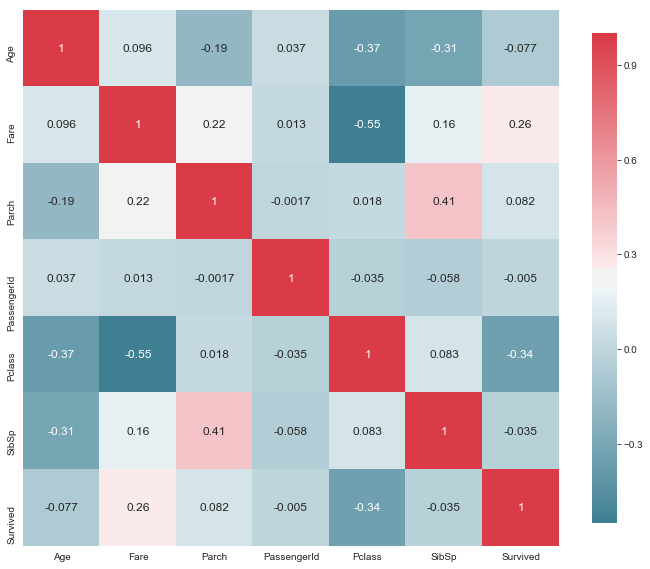

In [15]:
plot_correlation_map(titanic)

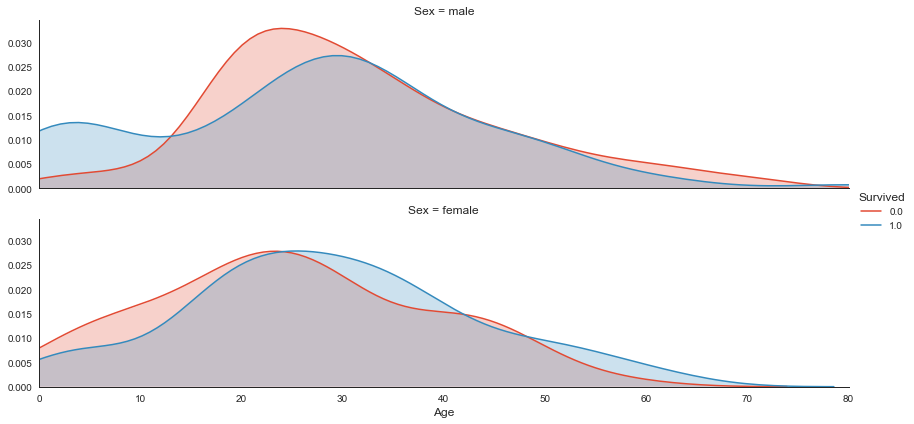

In [16]:
plot_distribution(titanic, var='Age',target='Survived' , row='Sex')

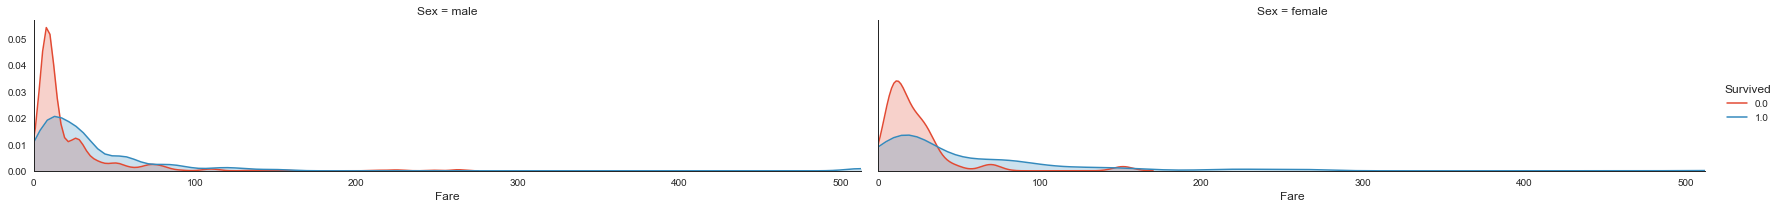

In [17]:
plot_distribution(titanic, var='Fare',target='Survived' , col='Sex')

A:\Anaconda\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


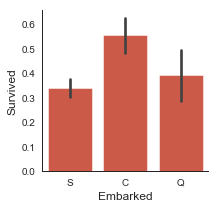

In [18]:
plot_categories(titanic, cat='Embarked' ,target='Survived')

A:\Anaconda\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


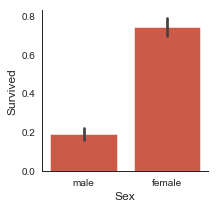

In [19]:
plot_categories(titanic, cat='Sex',target='Survived')

A:\Anaconda\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


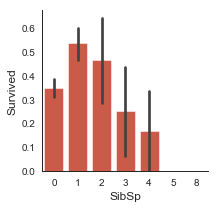

In [20]:
plot_categories(titanic, cat='SibSp',target='Survived')

A:\Anaconda\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


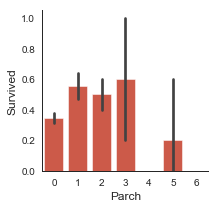

In [21]:
plot_categories(titanic, cat='Parch',target='Survived')

In [24]:
sex=pd.Series(np.where(full.Sex=='male' , 1 ,0 ), name='Sex')
embarked=pd.get_dummies(full.Embarked, prefix="Embarked" )
pclass=pd.get_dummies(full.Pclass , prefix="Pclass")
imputed= pd.DataFrame()
imputed[' Age '] = full.Age.fillna(full.Age.mean())
imputed['Fare'] = full.Fare.fillna(full.Fare.mean())
title =pd.DataFrame()
title['Title'] =full['Name'].map(lambda name:name.split(',')[1].split(".")[0].strip())

Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"
}

title["Title"] =title.Title.map(Title_Dictionary)
title=pd.get_dummies(title.Title, prefix="Title")
cabin=pd.DataFrame()

cabin['Cabin'] =full.Cabin.fillna('U')
cabin['Cabin']=cabin['Cabin'].map(lambda x:x[0])

cabin=pd.get_dummies(cabin.Cabin, prefix="Cabin")

family=pd.DataFrame()

family["FamilySize"] =full["Parch"] +full["SibSp"] +1

full_X = pd.concat( [ imputed , embarked , cabin , sex ] , axis=1 )
family["FamilySize"] =full["Parch"] +full["SibSp"] +1
family[ 'Family_Single' ] = family[ 'FamilySize' ].map( lambda s : 1 if s == 1 else 0 )
family[ 'Family_Small' ]  = family[ 'FamilySize' ].map( lambda s : 1 if 2 <= s <= 4 else 0 )
family[ 'Family_Large' ]  = family[ 'FamilySize' ].map( lambda s : 1 if 5 <= s else 0 )

In [27]:
family_new=pd.DataFrame()

family_new[ 'Family_Single' ]=family[ 'Family_Single' ]
family_new[ 'Family_Small' ]=family[ 'Family_Small']
family_new[ 'Family_Large' ]=family[ 'Family_Large' ]
family_new.head()

,Family_Single,Family_Small,Family_Large
0,0,1,0
1,0,1,0
2,1,0,0
3,0,1,0
4,1,0,0


In [28]:
full_X_v1 = pd.concat( [ imputed , embarked , cabin , sex, family_new ,title ] , axis=1 )

In [112]:
train_valid_X = full_X_v1[ 0:891 ]
train_valid_y = titanic.Survived
test_X = full_X_v1[ 891: ]
train_X , valid_X , train_y , valid_y = train_test_split( train_valid_X , train_valid_y , train_size = .7 )

print (full_X_v1.shape , train_X.shape , valid_X.shape , train_y.shape , valid_y.shape , test_X.shape)

(1309, 24) (623, 24) (268, 24) (623,) (268,) (418, 24)


In [37]:
model_RFC=RandomForestClassifier(n_estimators=200,random_state=1)
model_RFC.fit(train_X,train_y)
print(model_RFC.score(train_X,train_y), model_RFC.score(valid_X,valid_y))

0.9935794542536116 0.7835820895522388


In [100]:
gbm = xgb.XGBClassifier(max_depth=5, n_estimators=4000, learning_rate=0.01, random_state=1).fit(train_X, train_y)
gbm.fit(train_X,train_y)
print(gbm.score(train_X,train_y), gbm.score(valid_X,valid_y))

0.9662921348314607 0.8171641791044776


In [46]:
# turn run_gs to True if you want to run the gridsearch again.
run_gs = True

if run_gs:
    parameter_grid = {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [100, 200,300],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [True, False],
                 }
    forest = RandomForestClassifier()
    cross_validation = StratifiedKFold(n_splits=5)

    grid_search = GridSearchCV(forest,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation,
                               verbose=1
                              )

    grid_search.fit(train_X, train_y)
    model = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
    
else: 
    parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 
                  'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}
    
    model = RandomForestClassifier(**parameters)
    model.fit(train_X, train_y)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best score: 0.8282504012841091
Best parameters: {'bootstrap': True, 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}


[Parallel(n_jobs=1)]: Done 2430 out of 2430 | elapsed: 12.6min finished


In [87]:
new_model=RandomForestClassifier(bootstrap= True, max_depth= 4, max_features='auto', min_samples_leaf= 1, min_samples_split= 3, n_estimators= 100)

In [88]:
new_model.fit(train_X,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [89]:
print(new_model.score(train_X,train_y), gbm.score(valid_X,valid_y))

0.8346709470304976 0.8134328358208955


In [113]:
test_y = new_model.predict( test_X )
test_Y=test_y.astype(int)
passenger_id = full[891:].PassengerId
test = pd.DataFrame( { 'PassengerId': passenger_id , 'Survived': test_Y } )
test.shape
test.head()
test.to_csv( 'titanic_p.csv' , index = False )

In [114]:
accuracy_score(gender_submission.Survived,test_y)

0.9521531100478469

In [117]:
test.Survived=test.Survived.astype(int)
test.shape

(418, 2)

In [52]:
gbm_y=gbm.predict(test_X)

In [66]:
from sklearn.metrics import accuracy_score

In [103]:
accuracy_score(gender_submission.Survived,test_y)

0.854066985645933

In [62]:
gender_submission=pd.read_csv("gender_submission.csv")

In [95]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [97]:
ec=pd.read_csv("titanic_pred.csv")

In [98]:
ec.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
